In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# === LOAD DATA ===
df = pd.read_excel('Dataset for ML.xlsx')
df.head()

,Jenjang Pendidikan,Program Studi,Minat dan Bakat,Jalur Pendaftaran PENS,Rata-rata Nilai Masuk PENS,Rencana Karir
0,D3,Teknik Telekomunikasi,"Fisika, Teknik Tenaga Listrik (TTL)",SBMPN (Seleksi Bersama Masuk Politeknik Negeri),474.0,Network Engineer
1,D3,Teknologi Multimedia Broadcasting,"Kimia, Teknologi Komputer Jaringan (TKJ)",SNMPN (Seleksi Nasional Masuk Politeknik Negeri),77.4,Broadcast Engineer
2,D4,Sains Data Terapan,"Pemrograman, Statistika, Teknologi Komputer Ja...",SNMPN (Seleksi Nasional Masuk Politeknik Negeri),631.0,Machine Learning Engineer
3,D4,Teknologi Game,"Teknik Instalasi Tenaga Listrik (TITL), Teknol...",SNMPTN / SNBP (Seleksi Nasional Berdasarkan Pr...,86.1,Game Designer
4,D4,Teknologi Rekayasa Multimedia,"Fisika, Matematika, Desain Animasi",SBMPTN/SNBT (Seleksi Nasional Berdasarkan Tes),86.5,Digital Content Creator


# Exploratory Data Analysis

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jenjang Pendidikan          1000 non-null   object 
 1   Program Studi               1000 non-null   object 
 2   Minat dan Bakat             1000 non-null   object 
 3   Jalur Pendaftaran PENS      1000 non-null   object 
 4   Rata-rata Nilai Masuk PENS  1000 non-null   float64
 5   Rencana Karir               1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [33]:
# Distribusi jenjang pendidikan
print(df['Jenjang Pendidikan'].value_counts())

# Distribusi program studi
print(f"\n{df['Program Studi'].value_counts()}")

# Distribusi jalur pendaftaran
print(f"\n{df['Jalur Pendaftaran PENS'].value_counts()}")

# Distribusi rencana karir
print(f"\n{df['Rencana Karir'].value_counts()}")

Jenjang Pendidikan
D4    786
D3    214
Name: count, dtype: int64

Program Studi
Teknologi Game                       101
Teknik Elektro Industri               98
Sistem Pembangkit Energi              98
Teknologi Rekayasa Multimedia         90
Teknik Telekomunikasi                 87
Teknologi Rekayasa Internet           82
Teknik Informatika                    79
Teknologi Multimedia Broadcasting     77
Teknik Elektronika                    74
Teknik Mekatronika                    73
Teknik Komputer                       72
Sains Data Terapan                    69
Name: count, dtype: int64

Jalur Pendaftaran PENS
SNMPTN / SNBP (Seleksi Nasional Berdasarkan Prestasi)    272
SBMPTN/SNBT (Seleksi Nasional Berdasarkan Tes)           255
SBMPN (Seleksi Bersama Masuk Politeknik Negeri)          206
SNMPN (Seleksi Nasional Masuk Politeknik Negeri)         181
SIMANDIRI PENS                                            86
Name: count, dtype: int64

Rencana Karir
Automation Engineer             

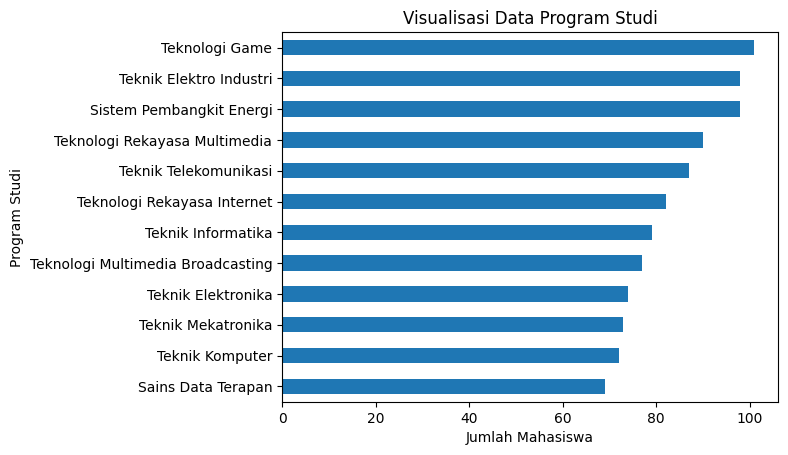

In [34]:
# Visualisai Data Program Studi
df['Program Studi'].value_counts().plot(kind='barh')
plt.title('Visualisasi Data Program Studi')
plt.xlabel('Jumlah Mahasiswa')
plt.gca().invert_yaxis()
plt.show()

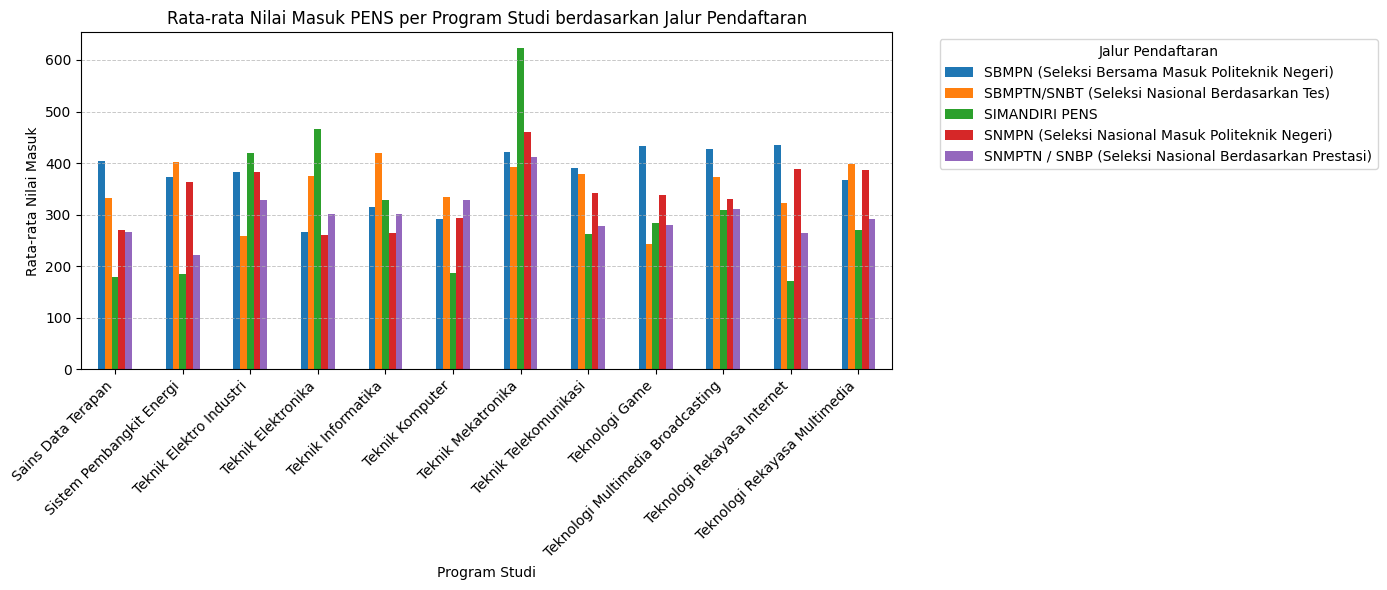

In [35]:
# Rata-rata nilai berdasarkan Jalur Masuk per Program Studi
# Buat pivot table
pivot_df = df.pivot_table(
    index='Program Studi',
    columns='Jalur Pendaftaran PENS',
    values='Rata-rata Nilai Masuk PENS',
    aggfunc='mean'
).fillna(0)

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 6))
plt.title('Rata-rata Nilai Masuk PENS per Program Studi berdasarkan Jalur Pendaftaran')
plt.ylabel('Rata-rata Nilai Masuk')
plt.xlabel('Program Studi')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Tambahkan garis bantu horizontal
plt.legend(title='Jalur Pendaftaran', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

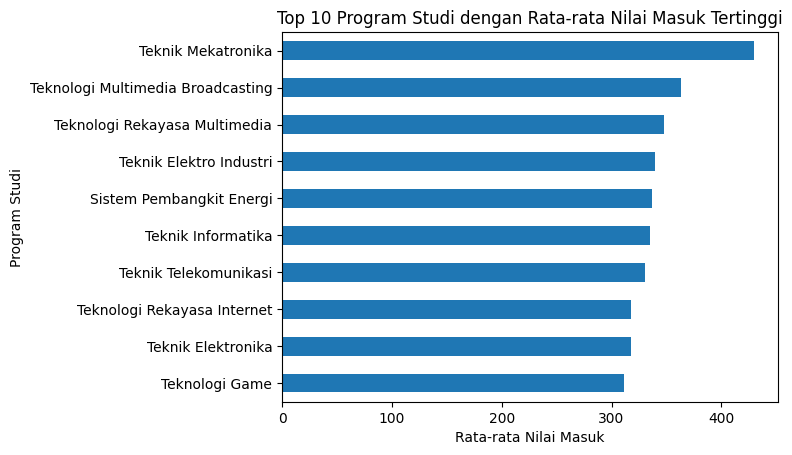

In [36]:
# Rata-rata nilai masuk per program studi (top 10)
mean_scores = df.groupby('Program Studi')['Rata-rata Nilai Masuk PENS'].mean().sort_values(ascending=False).head(10)
mean_scores.plot(kind='barh')
plt.title('Top 10 Program Studi dengan Rata-rata Nilai Masuk Tertinggi')
plt.xlabel('Rata-rata Nilai Masuk')
plt.gca().invert_yaxis()
plt.show()

# New Dataset

In [3]:
df = pd.read_csv('dataset_for_ml_fix.csv', delimiter=';')
df.drop(columns=['id'], inplace=True)
df.head()

,jenjang_pendidikan,minat_bakat,jalur_pendaftaran,rata_nilai,rencana_karir,prodi_rekomendasi_id
0,D3,"Fisika, Teknik Tenaga Listrik (TTL)",Jalur Tes Tulis,830.0,Network Engineer,2
1,D3,"Kimia, Teknologi Komputer Jaringan (TKJ)",Jalur Prestasi,91.0,Broadcast Engineer,7
2,D4,"Pemrograman, Statistika, Teknologi Komputer Ja...",Jalur Prestasi,95.6,Machine Learning Engineer,12
3,D4,"Teknik Instalasi Tenaga Listrik (TITL), Teknol...",Jalur Prestasi,86.1,Game Designer,9
4,D4,"Fisika, Matematika, Desain Animasi",Jalur Test Tulis,882.7,Digital Content Creator,11


In [4]:
# Mapping Kolom Program Studi dan Jalur Seleksi
dataset_prev = df.copy()
program_studi_mapping = {
    "Teknik Elektronika": 1,
    "Teknik Telekomunikasi": 2,
    "Teknik Elektro Industri": 3,
    "Teknik Informatika": 4,
    "Teknik Mekatronika": 5,
    "Teknik Komputer": 6,
    "Teknologi Multimedia dan Broadcasting": 7,
    "Sistem Pembangkit Energi": 8,
    "Teknologi Game": 9,
    "Teknologi Rekayasa Internet": 10,
    "Teknologi Rekayasa Multimedia": 11,
    "Sains Data Terapan": 12
}
# dataset_prev['prodi_rekomendasi_id'] = dataset_prev['prodi_rekomendasi_id'].map(program_studi_mapping)
# Mapping balik: dari ID ke nama
id_to_prodi = {v: k for k, v in program_studi_mapping.items()}
df['prodi_rekomendasi_id'] = df['prodi_rekomendasi_id'].map(id_to_prodi)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jenjang_pendidikan    1000 non-null   object 
 1   minat_bakat           1000 non-null   object 
 2   jalur_pendaftaran     1000 non-null   object 
 3   rata_nilai            1000 non-null   float64
 4   rencana_karir         1000 non-null   object 
 5   prodi_rekomendasi_id  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


# Feature Engineering

In [6]:
# === OHE FITUR MINAT_BAKAT ===
minat_bakat_dummies = df['minat_bakat'].str.get_dummies(sep=', ')
df = pd.concat([df, minat_bakat_dummies], axis=1)

# === DROP COLUMN ===
df = df.drop(columns=['minat_bakat'], axis=1)

# === SPLIT TRAIN-TEST DATA ===
X = df.drop('prodi_rekomendasi_id', axis=1)
y = df['prodi_rekomendasi_id']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=4824
)

# === IDENTIFIKASI FEATURES ===
numeric_features = ['rata_nilai']
categorical_target = ['jenjang_pendidikan', 'jalur_pendaftaran', 'rencana_karir']

# === NORMALISASI ===
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# === ENCODING ===
target_transformer = Pipeline(steps=[
    ('target_enc', TargetEncoder())
])

# === PREPROCESSING ===
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('target', target_transformer, categorical_target)
    ],
    remainder='passthrough',  # fitur one-hot Minat dan Bakat tidak hilang
    sparse_threshold=0
)

In [7]:
# Transformasi X_train menggunakan preprocessor
X_train_transformed = preprocessor.fit_transform(X_train, y_train)

# Ambil nama kolom hasil transformasi:
# - Kolom numeric setelah scaling
transformed_cols = numeric_features.copy()

# - Kolom categorical yang di-encode
transformed_cols += [f"{col}_enc" for col in categorical_target]

# - Kolom yang di-passthrough (sisa kolom lain, termasuk one-hot Minat dan Bakat)
passthrough_cols = [col for col in X_train.columns if col not in numeric_features + categorical_target]
transformed_cols += passthrough_cols

# Buat dataframe dari hasil transformasi
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_cols, index=X_train.index)

# Tampilkan hasil transformasi
X_train_transformed_df.head()


,rata_nilai,jenjang_pendidikan_enc,jalur_pendaftaran_enc,rencana_karir_enc,Desain Animasi,Desain Grafis,Elektronika,Fisika,Kimia,Matematika,Multimedia,Pemrograman,Statistika,Teknik Instalasi Tenaga Listrik (TITL),Teknik Tenaga Listrik (TTL),Teknologi Komputer Jaringan (TKJ)
590,1.143390,5.512774,5.326390,3.050008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,0.585436,5.512774,5.729137,7.884800,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
447,-1.005524,5.512774,5.385093,6.773571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
315,1.421822,5.512774,5.955801,5.067489,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
94,1.161116,5.512774,5.955801,5.697406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Baseline Model

In [8]:
# === MODEL DECISION TREE ===
baseline_pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

baseline_pipe_dt.fit(X_train, y_train)

# === PREDIKSI DAN EVALUASI ===
y_pred_train = baseline_pipe_dt.predict(X_train)
y_pred_test = baseline_pipe_dt.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Baseline Decision Tree Accuracy on Train Set: {train_acc:.4f}")
print(f"Baseline Decision Tree Accuracy on Test Set : {test_acc:.4f}")


Baseline Decision Tree Accuracy on Train Set: 1.0000
Baseline Decision Tree Accuracy on Test Set : 0.9633


In [11]:
# === MODEL RANDOM FOREST ===
baseline_pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

baseline_pipe_rf.fit(X_train, y_train)

# === PREDIKSI DAN EVALUASI ===
y_pred_train = baseline_pipe_rf.predict(X_train)
y_pred_test = baseline_pipe_rf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Baseline Random Forest Accuracy on Train Set: {train_acc:.4f}")
print(f"Baseline Random Forest Accuracy on Test Set : {test_acc:.4f}")


Baseline Random Forest Accuracy on Train Set: 1.0000
Baseline Random Forest Accuracy on Test Set : 0.7200


In [12]:
# === MODEL EXTRA TREES ===
baseline_pipe_et = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

baseline_pipe_et.fit(X_train, y_train)

# === PREDIKSI DAN EVALUASI ===
y_pred_train = baseline_pipe_et.predict(X_train)
y_pred_test = baseline_pipe_et.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Baseline Extra Tree Accuracy on Train Set: {train_acc:.4f}")
print(f"Baseline Extra Tree Accuracy on Test Set : {test_acc:.4f}")


Baseline Extra Tree Accuracy on Train Set: 1.0000
Baseline Extra Tree Accuracy on Test Set : 0.7067


# Hyperparameter Tuning

In [9]:
# === DECISION TREE CLASSIFIER ===
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# === HYPERPARAMETER GRID ===
param_grid = {
    'classifier__criterion': ['entropy', 'gini'],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': [1.0, 'sqrt', 'log2'],
    'classifier__min_impurity_decrease': [0.0, 0.001],
    'classifier__splitter': ['best', 'random']
}

# === CROSS VALIDATION & GRID SEARCH ===
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipe, param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"\nBest Hyperparameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Fitting 10 folds for each of 864 candidates, totalling 8640 fits

Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 1.0, 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__splitter': 'best'}
Best CV Accuracy: 0.9843


# Model Evaluation

In [10]:
# === EVALUASI DI TRAIN SET ===
y_pred_train = grid_search.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print(f"Train Set Accuracy: {train_acc:.4f}")

# === EVALUASI DI TEST SET ===
y_pred_test = grid_search.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {test_acc:.4f}")

Train Set Accuracy: 0.9943
Test Set Accuracy: 0.9567


In [11]:
# === CLASSIFICATION REPORT ===
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
                                       precision    recall  f1-score   support

                   Sains Data Terapan       1.00      1.00      1.00        21
             Sistem Pembangkit Energi       1.00      1.00      1.00        29
              Teknik Elektro Industri       0.77      0.79      0.78        29
                   Teknik Elektronika       1.00      1.00      1.00        22
                   Teknik Informatika       1.00      1.00      1.00        24
                      Teknik Komputer       1.00      1.00      1.00        22
                   Teknik Mekatronika       0.71      0.68      0.70        22
                Teknik Telekomunikasi       1.00      1.00      1.00        26
                       Teknologi Game       1.00      1.00      1.00        30
Teknologi Multimedia dan Broadcasting       1.00      1.00      1.00        23
          Teknologi Rekayasa Internet       1.00      1.00      1.00        25
        Teknologi Rekayasa 

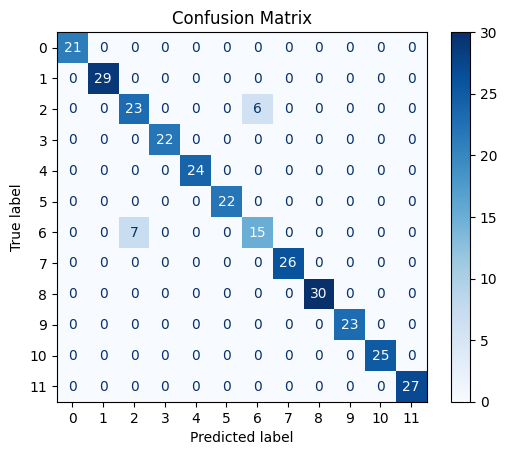

In [12]:
# === CONFUSION MATRIX ===
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

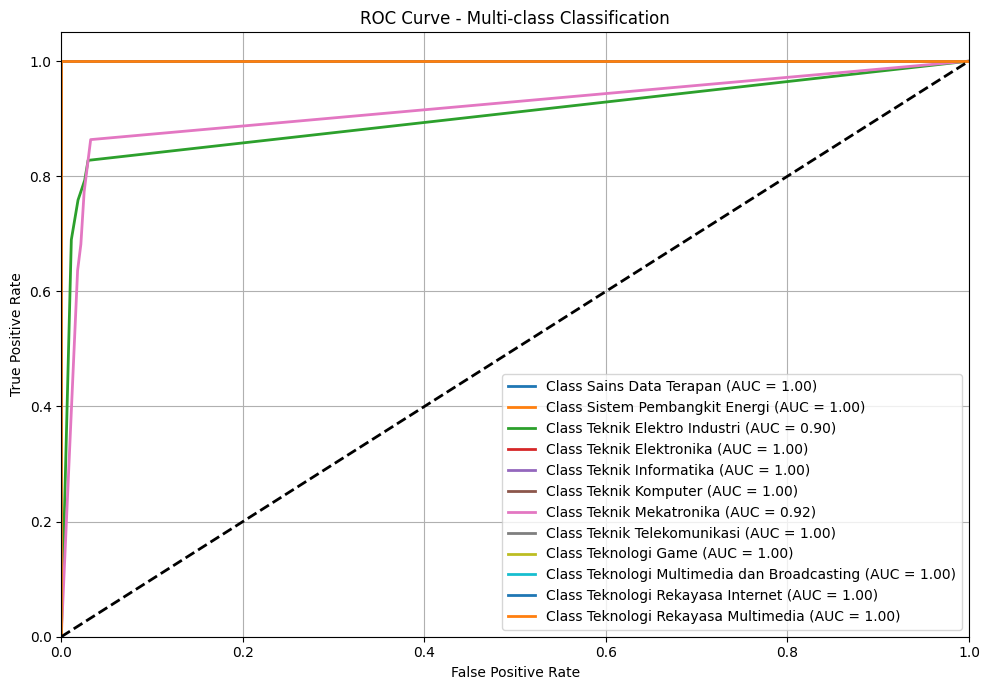

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# === ROC CURVE FOR MULTICLASS ===
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=grid_search.classes_)
y_score = grid_search.predict_proba(X_test)

n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {grid_search.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-class Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
best_model = grid_search.best_estimator_

def prediksi_program_studi(data_baru, best_model, X_train, numeric_features, categorical_target, program_studi_mapping):
    # Menyamakan kolom dataset dengan hasil training model
    minat_bakat_columns = [col for col in X_train.columns if col not in numeric_features + categorical_target]

    minat_bakat_dummies = data_baru['minat_bakat'].str.get_dummies(sep=', ')
    for col in minat_bakat_columns:
        if col not in minat_bakat_dummies.columns:
            minat_bakat_dummies[col] = 0
    minat_bakat_dummies = minat_bakat_dummies[minat_bakat_columns]

    data_baru_processed = data_baru.drop('minat_bakat', axis=1)
    data_baru_final = pd.concat([data_baru_processed, minat_bakat_dummies], axis=1)
    data_baru_final = data_baru_final[X_train.columns]

    prediksi_id = best_model.predict(data_baru_final)[0]

    # Prediksi data baru
    hasil = program_studi_mapping.get(prediksi_id, "Program studi tidak ditemukan")

    print(f"Hasil Prediksi (ID): {hasil}")
    print(f"Hasil Prediksi (Nama Prodi): {prediksi_id}")

    return hasil

In [15]:
data_baru = pd.DataFrame({
    'jenjang_pendidikan': ['D3'],
    'minat_bakat': ['Teknologi Informasi, Desain Animasi'],
    'jalur_pendaftaran': ['Jalur Prestasi'],
    'rencana_karir': ['Broadcast Engineer'],
    'rata_nilai': [90.0]
})

hasil = prediksi_program_studi(data_baru, best_model, X_train, numeric_features, categorical_target, program_studi_mapping)

Hasil Prediksi (ID): 7
Hasil Prediksi (Nama Prodi): Teknologi Multimedia dan Broadcasting


In [16]:
# Data baru dalam format DataFrame
data_baru = pd.DataFrame({
    'jenjang_pendidikan': ['D3'],
    'minat_bakat': ['Teknologi Informasi, Matematika'],
    'jalur_pendaftaran': ['Jalur Tes Tulis'],
    'rencana_karir': ['Business Intelligence Analyst'],
    'rata_nilai': [850.0]
})

hasil = prediksi_program_studi(data_baru, best_model, X_train, numeric_features, categorical_target, program_studi_mapping)

Hasil Prediksi (ID): 3
Hasil Prediksi (Nama Prodi): Teknik Elektro Industri


In [17]:
# Data baru dalam format DataFrame
data_baru = pd.DataFrame({
    'jenjang_pendidikan': ['D3'],
    'minat_bakat': ['Fisika, Matematika'],
    'jalur_pendaftaran': ['SIMANDIRI'],
    'rencana_karir': ['Network Engineer'],
    'rata_nilai': [700.0]
})

hasil = prediksi_program_studi(data_baru, best_model, X_train, numeric_features, categorical_target, program_studi_mapping)

Hasil Prediksi (ID): 2
Hasil Prediksi (Nama Prodi): Teknik Telekomunikasi


In [18]:
import joblib

# Simpan model yang telah dilatih
joblib.dump(best_model, 'model.pkl')

# Buat metadata penting untuk proses prediksi
metadata = {
    'minat_bakat_columns': [col for col in X_train.columns if col not in numeric_features + categorical_target],
    'X_columns': X_train.columns.tolist(), 
    'program_studi_mapping': program_studi_mapping,
}

# Simpan metadata ke file
joblib.dump(metadata, 'metadata.pkl')

print("Model dan metadata berhasil disimpan.")

Model dan metadata berhasil disimpan.


In [19]:
import joblib
import pandas as pd

# Load model dan metadata
model = joblib.load('model.pkl')
metadata = joblib.load('metadata.pkl')

def prediksi_program_studi(data_baru):
    minat_bakat_columns = metadata['minat_bakat_columns']
    X_columns = metadata['X_columns']

    # Proses 'Minat dan Bakat'
    minat_bakat_dummies = data_baru['minat_bakat'].str.get_dummies(sep=', ')
    for col in minat_bakat_columns:
        if col not in minat_bakat_dummies.columns:
            minat_bakat_dummies[col] = 0
    minat_bakat_dummies = minat_bakat_dummies[minat_bakat_columns]

    # Gabung dan urutkan kolom
    data_baru_processed = data_baru.drop('minat_bakat', axis=1)
    data_baru_final = pd.concat([data_baru_processed, minat_bakat_dummies], axis=1)
    data_baru_final = data_baru_final[X_columns]

    # Prediksi
    prediksi = model.predict(data_baru_final)[0]
    return prediksi


In [20]:
data_baru = pd.DataFrame({
    'jenjang_pendidikan': ['D3'],
    'minat_bakat': ['Teknologi Informasi, Desain Animasi'],
    'jalur_pendaftaran': ['Jalur Prestasi'],
    'rencana_karir': ['Broadcast Engineer'],
    'rata_nilai': [95.0]
})

hasil = prediksi_program_studi(data_baru)
print("Program Studi:", hasil)


Program Studi: Teknologi Multimedia dan Broadcasting


### TIDAK PERLU DI RUN

In [21]:
import pandas as pd

# Baca data
data = pd.read_csv("dataset_for_ml_fix.csv")
minba_series = data["Rencana Karir"]

# Langkah: pisahkan berdasarkan koma dan kumpulkan semua ke satu list
all_minat_bakat = []
for item in minba_series.dropna():  # dropna jika ada NaN
    split_items = [x.strip() for x in item.split(',')]
    all_minat_bakat.extend(split_items)

# Ambil yang unik
unique_minat_bakat = sorted(set(all_minat_bakat))

# Tampilkan
print(unique_minat_bakat)


ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 4


In [22]:
import joblib

# Load metadata yang sudah disimpan
metadata = joblib.load('metadata.pkl')

# Ambil dan cetak urutan kolom dari X_train
X_columns = metadata['X_columns']

# Tampilkan semua kolom
print("Urutan kolom X_train yang disimpan:")
for i, col in enumerate(X_columns, 1):
    print(f"{i}. {col}")


Urutan kolom X_train yang disimpan:
1. jenjang_pendidikan
2. jalur_pendaftaran
3. rata_nilai
4. rencana_karir
5. Desain Animasi
6. Desain Grafis
7. Elektronika
8. Fisika
9. Kimia
10. Matematika
11. Multimedia
12. Pemrograman
13. Statistika
14. Teknik Instalasi Tenaga Listrik (TITL)
15. Teknik Tenaga Listrik (TTL)
16. Teknologi Komputer Jaringan (TKJ)
